In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('dataset.xlsx')
df = df.set_index(pd.DatetimeIndex(df['tf'].values))
df.drop(['tf'], inplace = True, axis = 1)
y = 'Rates_0'
df.head()

,Rates_0,Rates_1,Rates_2,Rates_3,Rates_4,Rates_5,Rates_6,Rates_7,Rates_8,Rates_9,Rates_10
2008-01-02,36.25,3.843,3.930,4.208,4.534,3.978,4.482,4.239,-4.350,17.570,18.700
2008-01-03,37.20,3.813,3.904,4.191,4.533,3.957,4.470,4.233,-3.325,18.305,19.350
2008-01-04,38.90,3.763,3.837,4.134,4.511,3.904,4.424,4.178,-2.545,18.455,21.450
2008-01-07,39.55,3.788,3.837,4.129,4.518,3.936,4.436,4.189,-2.825,18.675,22.575
2008-01-08,40.45,3.828,3.871,4.158,4.540,3.976,4.452,4.212,-2.625,19.275,22.875


In [3]:
# Calculate SMA based on all assets
df['Mean'] = df.mean(axis=1)
window_size = 10
df['SMA'] = df['Mean'].rolling(window=window_size).mean()

In [4]:
df['Simple_Returns'] = df.pct_change(1)['Mean']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Mean']/df['SMA']
df.head()

C:\ProgramData\App-V\E1A6F8DE-010D-42A4-90BD-1BCE721856D0\87AD6F0C-0070-4952-832C-71F207691D5F\Root\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Rates_0,Rates_1,Rates_2,Rates_3,Rates_4,Rates_5,Rates_6,Rates_7,Rates_8,Rates_9,Rates_10,Mean,SMA,Simple_Returns,Log_Returns,Ratios
2008-01-02,36.25,3.843,3.930,4.208,4.534,3.978,4.482,4.239,-4.350,17.570,18.700,8.853091,NaN,NaN,NaN,NaN
2008-01-03,37.20,3.813,3.904,4.191,4.533,3.957,4.470,4.233,-3.325,18.305,19.350,9.148273,NaN,0.033342,0.032798,NaN
2008-01-04,38.90,3.763,3.837,4.134,4.511,3.904,4.424,4.178,-2.545,18.455,21.450,9.546455,NaN,0.043525,0.042605,NaN
2008-01-07,39.55,3.788,3.837,4.129,4.518,3.936,4.436,4.189,-2.825,18.675,22.575,9.709818,NaN,0.017112,0.016968,NaN
2008-01-08,40.45,3.828,3.871,4.158,4.540,3.976,4.452,4.212,-2.625,19.275,22.875,9.910182,NaN,0.020635,0.020425,NaN


In [5]:
df['SMA_Y'] = df[y].rolling(window=window_size).mean()
df['Simple_Returns_Y'] = df.pct_change(1)[y]
df['Log_Returns_Y'] = np.log(1+df['Simple_Returns_Y'])
df['Ratios_Y'] = df[y]/df['SMA_Y']
df.head()

,Rates_0,Rates_1,Rates_2,Rates_3,Rates_4,Rates_5,Rates_6,Rates_7,Rates_8,Rates_9,Rates_10,Mean,SMA,Simple_Returns,Log_Returns,Ratios,SMA_Y,Simple_Returns_Y,Log_Returns_Y,Ratios_Y
2008-01-02,36.25,3.843,3.930,4.208,4.534,3.978,4.482,4.239,-4.350,17.570,18.700,8.853091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,37.20,3.813,3.904,4.191,4.533,3.957,4.470,4.233,-3.325,18.305,19.350,9.148273,NaN,0.033342,0.032798,NaN,NaN,0.026207,0.025869,NaN
2008-01-04,38.90,3.763,3.837,4.134,4.511,3.904,4.424,4.178,-2.545,18.455,21.450,9.546455,NaN,0.043525,0.042605,NaN,NaN,0.045699,0.044685,NaN
2008-01-07,39.55,3.788,3.837,4.129,4.518,3.936,4.436,4.189,-2.825,18.675,22.575,9.709818,NaN,0.017112,0.016968,NaN,NaN,0.016710,0.016571,NaN
2008-01-08,40.45,3.828,3.871,4.158,4.540,3.976,4.452,4.212,-2.625,19.275,22.875,9.910182,NaN,0.020635,0.020425,NaN,NaN,0.022756,0.022501,NaN


In [6]:
df['Difference'] = df['Ratios'] - df['Ratios_Y']
std_difference = df['Difference'].std()
var_difference = df['Difference'].var()
print(f'Standard Deviation: {std_difference}')
print(f'Variance: {var_difference}')

Standard Deviation: 0.10573348083828675
Variance: 0.011179568970180352


In [7]:
training_window_size = 60  
test_window_size = int(training_window_size / 80 * 20) 
df['Buy'] = np.nan
df['Sell'] = np.nan
df['position'] = np.nan

In [8]:
# Loop through the DataFrame to create rolling windows
for start in range(len(df) - training_window_size - test_window_size):
    training_window = df.iloc[start:start + training_window_size]
    test_window = df.iloc[start + training_window_size:start + training_window_size + test_window_size]
    
    # Calculate rolling percentiles for the training window
    p5 = training_window['Ratios'].quantile(0.05)
    p50 = training_window['Ratios'].quantile(0.50)
    p95 = training_window['Ratios'].quantile(0.95)
    
    df.loc[test_window.index, 'p5'] = p5
    df.loc[test_window.index, 'p50'] = p50
    df.loc[test_window.index, 'p95'] = p95
    
    # Generate signals for the test window
    test_window['position'] = np.nan
    test_window.loc[test_window['Ratios_Y'] < p5, 'position'] = 1
    test_window.loc[test_window['Ratios_Y'] > p95, 'position'] = -1
    test_window['position'] = test_window['position'].ffill()

C:\ProgramData\App-V\E1A6F8DE-010D-42A4-90BD-1BCE721856D0\87AD6F0C-0070-4952-832C-71F207691D5F\Root\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\App-V\E1A6F8DE-010D-42A4-90BD-1BCE721856D0\87AD6F0C-0070-4952-832C-71F207691D5F\Root\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\App-V\E1A6F8DE-010D-42A4-90BD-1BCE721856D0\87AD6F0C-0070-4952-832C-71F207691D5F\Root\lib\site-packages

In [9]:
#Add buy/sell signals
df['Buy'] = np.where(df.position == 1, df[y], np.nan)
df['Sell'] = np.where(df.position == -1, df[y], np.nan)

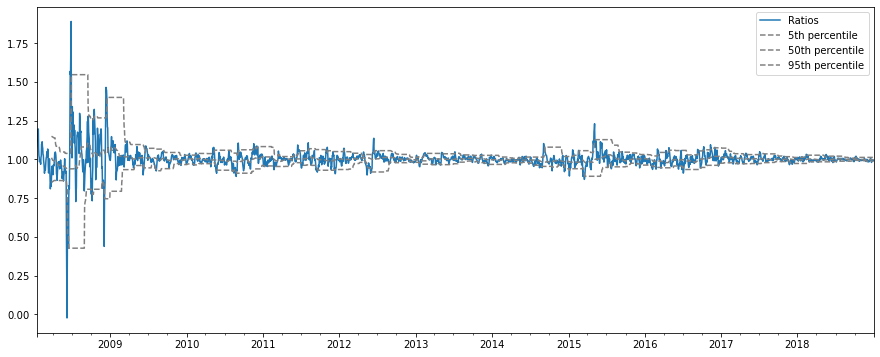

In [10]:
# Plotting the Ratios and the rolling percentiles
plt.figure(figsize=(15, 6))
df['Ratios'].dropna().plot(legend=True)
df['p5'].dropna().plot(legend=True, linestyle='--', label='5th percentile', color='gray')
df['p50'].dropna().plot(legend=True, linestyle='--', label='50th percentile', color='gray')
df['p95'].dropna().plot(legend=True, linestyle='--', label='95th percentile', color='gray')
plt.legend()
plt.show()

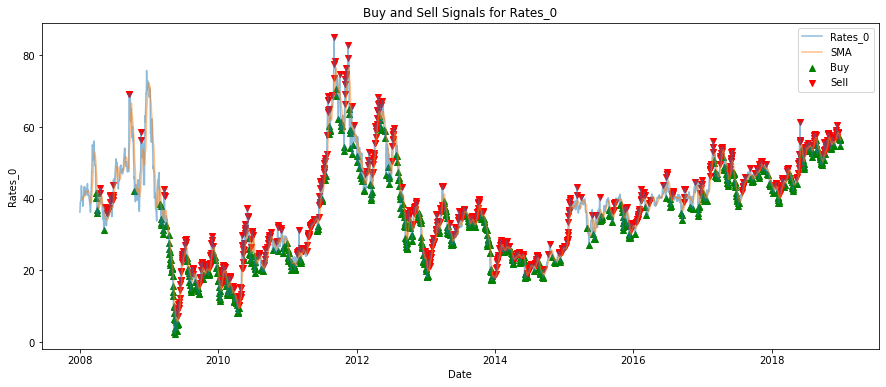

In [11]:
#Plot Buy/Sell signals
plt.figure(figsize=(15, 6))
plt.title(f'Buy and Sell Signals for {y}')
plt.plot(df[y], alpha=0.5, label=y)
plt.plot(df['SMA_Y'], alpha=0.5, label='SMA')
plt.scatter(df.index, df['Buy'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', label='Sell', marker='v', alpha=1)
plt.xlabel('Date')
plt.ylabel(y)
plt.legend()
plt.show()

In [12]:
df['Strategy_Returns_Y'] = df.position.shift(1) * df.Log_Returns_Y
df['Strategy_Returns_Y']

2008-01-02         NaN
2008-01-03         NaN
2008-01-04         NaN
2008-01-07         NaN
2008-01-08         NaN
                ...   
2018-12-25    0.000000
2018-12-26    0.000000
2018-12-27   -0.000496
2018-12-28   -0.030338
2018-12-31    0.000000
Name: Strategy_Returns_Y, Length: 2869, dtype: float64

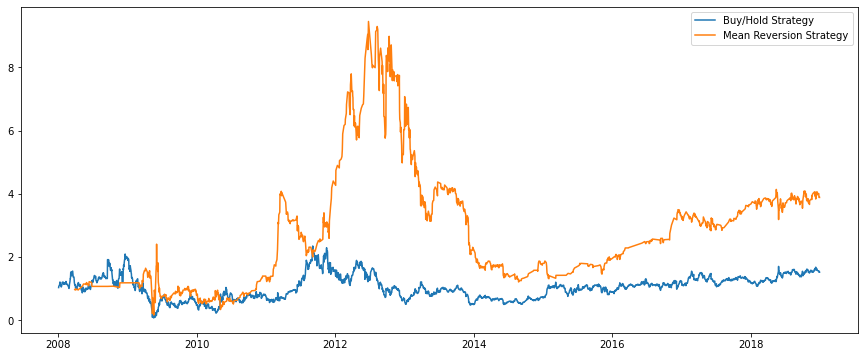

In [13]:
plt.figure(figsize=(15,6))
log_returns = df['Log_Returns_Y'].dropna()
strategy_returns = df['Strategy_Returns_Y'].dropna()
plt.plot(np.exp(log_returns).cumprod(), label='Buy/Hold Strategy')
plt.plot(np.exp(strategy_returns).cumprod(), label='Mean Reversion Strategy')
plt.legend();

In [14]:
print('Buy/Hold Strategy Returns:', np.exp(log_returns).cumprod()[-1] - 1)
print('Mean Reversion Strategy Returns:', np.exp(strategy_returns).cumprod()[-1] - 1)

Buy/Hold Strategy Returns: 0.511724137931044
Mean Reversion Strategy Returns: 2.8810369751914116
